### API requests and more

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import sub
import datetime

api_key = 'a0376cd9d4dce9f2213b7ca9a21cc905'

lat = 48.5227
lon = 9.0522

lat_erb, lon_erb = 48.3284, 9.8875


Bad key "text.kerning_factor" on line 4 in
/home/emsigeechse/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Actual

In [2]:
city = 'Tübingen'#input('Enter city name: ')

url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    temp = data['main']['temp']
    desc = data['weather'][0]['description']
    print(f'Temperature: {temp} K')
    print(f'Description: {desc}')
else:
    print('Error fetching weather data')

Temperature: 284.65 K
Description: overcast clouds


In [5]:
T = data['dt']
print(type(datetime.datetime.fromtimestamp(T).strftime('%H')))

<class 'str'>


Forecast

In [3]:
url = f'http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print('Error fetching weather data')

In [95]:
temp_str = {1:'deg', 2:'eV'}

print(temp_str.get(3))

None


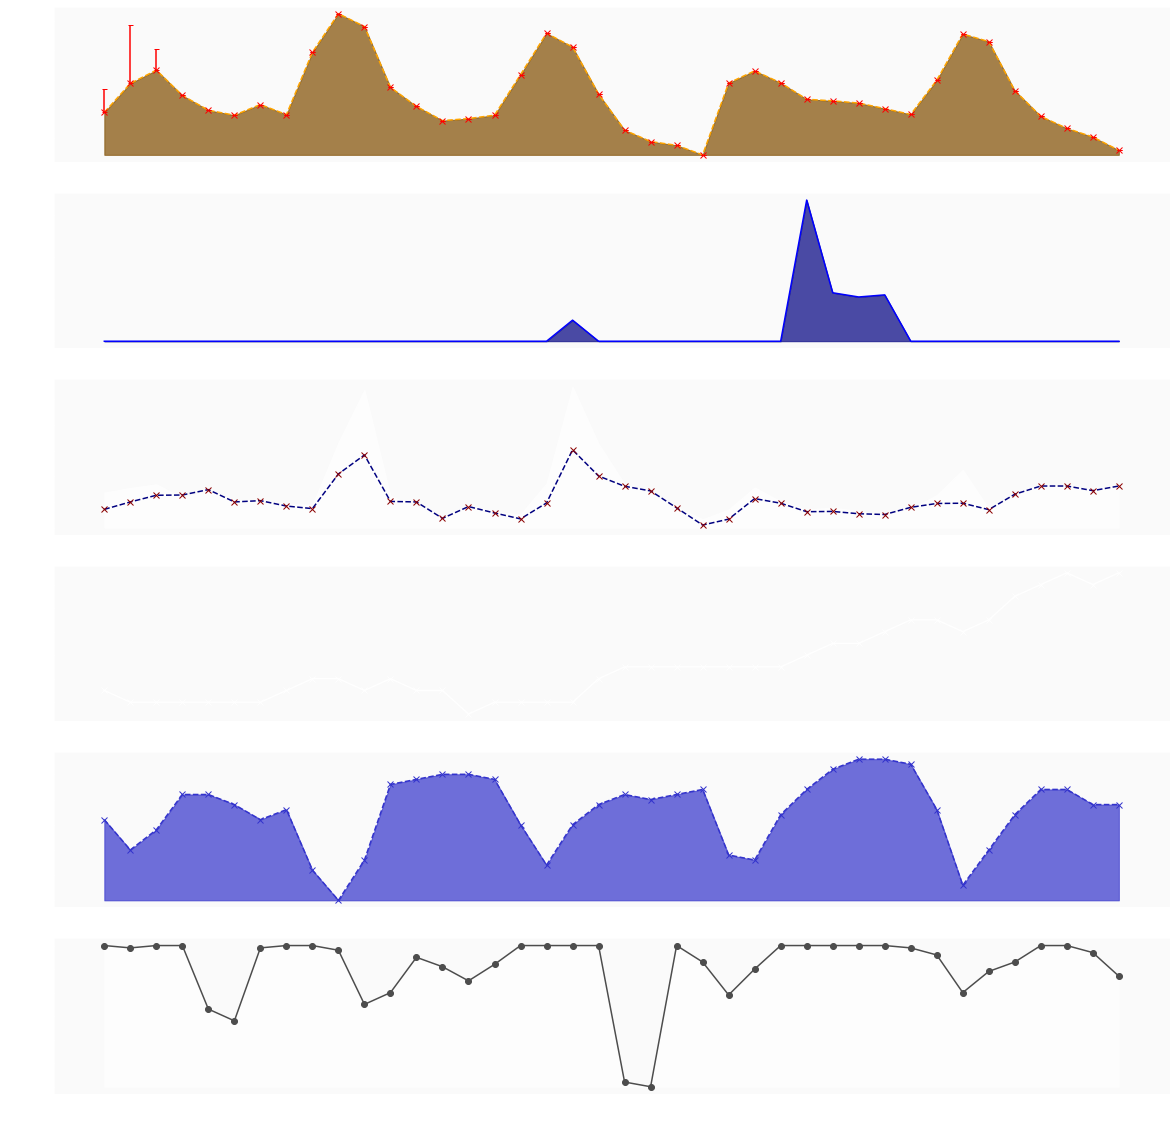

In [96]:

from kivy.storage.jsonstore import JsonStore

data = JsonStore('forecast.json').get('list')

for i in range(5):
    plt.close()
def rain_fill(num):
    try:
        return num.get('rain').get('3h')
    except:
        return 0

liste = data
dt = [i.get('dt') for i in data]
T = [i.get('main').get('temp')-273.15 for i in data]
T_min, T_max = [i.get('main').get('temp_min')-273.15 for i in data] , [i.get('main').get('temp_max')-273.15 for i in data] 
T_err_min, T_err_max = list(map(sub, T, T_min)), list(map(sub, T_max, T))
rain_lst = [rain_fill(i) for i in data]
wind_speed = [i.get('wind').get('speed') for i in data]
gust_speed = [i.get('wind').get('gust') for i in data]
press_lst = [i.get('main').get('pressure') for i in data]
hum_lst = [i.get('main').get('humidity') for i in data]
cloud_lst = [i.get('clouds').get('all') for i in data]

fig = plt.figure()
fig.set_size_inches(20, 20)
fig.tight_layout()
fig.set_edgecolor('white')

temp = fig.add_subplot(6,1,1)
rain = fig.add_subplot(6, 1, 2)
wind = fig.add_subplot(6, 1, 3)
pres = fig.add_subplot(6, 1, 4)
hum = fig.add_subplot(6, 1, 5)
clouds = fig.add_subplot(6,1,6)

for i in [temp, rain, wind, pres, hum, clouds]:
    i.set_facecolor((.9,.9,.9,.2))
    i.tick_params('y', colors='white')
    i.tick_params('x', colors=(1,1,1,0))
    for j in ['right', 'left', 'top', 'bottom']:
        i.spines[j].set_color('white')

temp.set_ylabel('Temp in C', color='white')
temp.errorbar(dt, T, yerr=(T_err_min, T_err_max), 
              ls='dashed', marker='x', color='orange', 
              barsabove=True, capsize=2.5, markerfacecolor='red',
              ecolor='red', markeredgecolor='red')
temp.fill_between(dt, min(T), T, color=(.5,.3,0,.7))

rain.set_ylabel('Rain in mm', color='white')
rain.fill_between(dt, 0, rain_lst, color=(0,0,.5,.7))
rain.plot(dt, rain_lst, color='blue')

wind.set_ylabel('Wind m/s', color='white')
wind.plot(dt, wind_speed, color='navy', 
              ls='dashed', marker='x', 
              markeredgecolor='darkred',
              markerfacecolor='darkred')
wind.fill_between(dt, 0, gust_speed, color=(1,1,1,.7))

pres.set_ylabel('Pressure hPa', color='white')
pres.plot(dt, press_lst, color='white', marker='x')

hum.set_ylabel('Humidity', color='white')
hum.plot(dt, hum_lst, color=(.2,.2,.8,1), ls='dashed', marker='x')
hum.fill_between(dt, min(hum_lst), hum_lst, color=(.2,.2,.8,.7))

clouds.set_ylabel('Clouds in perc.', color='white')
clouds.plot(dt, cloud_lst, color=(.3,.3,.3,1), marker='o')
clouds.fill_between(dt, min(cloud_lst), cloud_lst, color=(1,1,1,.7))


In [40]:
lst1 = [i for i in range(100)]

for i in range(100000):
    lst1 = [i*2 for i in lst1]

In [49]:
import numpy as np

arr1 = np.arange(0,100, dtype='int64')

for i in range(100000):
    arr1 = np.multiply(2, arr1)
    